### Import/Install packages to perform EDA

MySQL Connector is to perform insert and select query with AWS RDS

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

### Read Questions Dataset. Latin 1 encoding is to remove erro 0xed while reading

In [6]:
questionsdf = pd.read_csv('https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv',encoding='latin-1')

In [7]:
questionsdf

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
...,...,...,...,...,...,...,...
1264211,40143210,5610777.0,2016-10-19T23:38:01Z,NaN,0,URL routing in PHP (MVC),<p>I am building a custom MVC project and I ha...
1264212,40143300,3791161.0,2016-10-19T23:48:09Z,NaN,0,Bigquery.Jobs.Insert - Resumable Upload?,<p>The API docs show that you should be able t...
1264213,40143340,7028647.0,2016-10-19T23:52:50Z,NaN,1,Obfuscating code in android studio,<p>Under minifyEnabled I changed from false to...
1264214,40143360,871677.0,2016-10-19T23:55:24Z,NaN,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...


### Similar to Question dataset and encoding

In [8]:
answersdf = pd.read_csv('https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv',encoding='latin-1')

In [9]:
answersdf

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."
...,...,...,...,...,...,...
2014511,40143247,333403.0,2016-10-19T23:42:35Z,40143190,0,"<p>Tanks to <a href=""http://stackoverflow.com/..."
2014512,40143322,642706.0,2016-10-19T23:50:35Z,40137110,1,<h1>tl;dr</h1>\n\n<pre><code>ZonedDateTime.par...
2014513,40143336,2239781.0,2016-10-19T23:52:08Z,40141860,0,<p>I came up with a very dirty workaround. Bef...
2014514,40143349,6934347.0,2016-10-19T23:54:02Z,40077010,0,<p>I solved my own problem defining the follow...


In [10]:
tagsdf = pd.read_csv('https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv')

In [11]:
tagsdf

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
...,...,...
3750989,40143360,javascript
3750990,40143360,vue.js
3750991,40143380,npm
3750992,40143380,mocha


In [12]:
usersdf = pd.read_csv('https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv')

In [13]:
usersdf

,Unnamed: 0,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
1,1,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
2,2,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
3,3,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
4,4,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
...,...,...,...,...,...,...,...,...,...
1990475,1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283 UTC,2019-08-28 18:01:29.56 UTC,415,112,2,17
1990476,1990476,6820506,Manuela,2016-09-12 00:19:17.83 UTC,2018-07-20 01:28:24.853 UTC,21,38,0,50
1990477,1990477,4464432,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
1990478,1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191


### Drop unnecessary read column to filter the data

In [14]:
usersdf.drop(labels='Unnamed: 0', axis=1, inplace=True)

### Drop Duplicates from users file as it has true duplicates

In [15]:
usersdf.drop_duplicates(inplace=True)

In [16]:
usersdf

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96
...,...,...,...,...,...,...,...,...
1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283 UTC,2019-08-28 18:01:29.56 UTC,415,112,2,17
1990476,6820506,Manuela,2016-09-12 00:19:17.83 UTC,2018-07-20 01:28:24.853 UTC,21,38,0,50
1990477,4464432,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191


In [17]:
usersdf.describe()

,id,reputation,up_votes,down_votes,views
count,4.654600e+05,4.654600e+05,465460.000000,465460.000000,4.654600e+05
mean,2.250135e+06,1.977049e+03,192.808177,29.028587,2.400751e+02
std,1.789188e+06,1.098895e+04,640.398587,515.594736,3.396432e+03
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00
25%,7.664470e+05,6.600000e+01,3.000000,0.000000,1.200000e+01
50%,1.774502e+06,3.530000e+02,26.000000,0.000000,4.500000e+01
75%,3.478470e+06,1.165000e+03,130.000000,5.000000,1.440000e+02
max,7.045028e+06,1.128126e+06,100520.000000,74955.000000,1.835157e+06


### Filter Users which has reputation score 1 and no upvotes/downvotes/views

This indicates these users are either inactive or has not been part of any significant contribution or there in stackoverflow
as registered user spanning through answers or tags but not important right now for our analysis

In [18]:
usersdf[(usersdf.reputation == 1) & (usersdf.up_votes == 0) & (usersdf.down_votes == 0) & (usersdf.views == 0)]

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
6550,3958714,mohammad sadeq,2014-08-20 04:36:20.907 UTC,2019-08-31 11:54:15.037 UTC,1,0,0,0
9531,4264224,Pancuz Kumar,2014-11-18 06:32:56.983 UTC,2015-09-28 21:40:53.45 UTC,1,0,0,0
14130,2198134,prageeth,2013-03-22 06:54:29.32 UTC,2013-03-22 09:39:39.673 UTC,1,0,0,0
14880,5635855,J. J.,2015-12-03 16:10:12.597 UTC,2015-12-03 16:10:12.597 UTC,1,0,0,0
28782,3390382,user3390382,2014-03-06 22:41:02.18 UTC,2014-03-07 03:10:53.707 UTC,1,0,0,0
...,...,...,...,...,...,...,...,...
1990120,6247015,alawy,2016-04-24 09:40:11.857 UTC,2016-12-06 02:42:40.883 UTC,1,0,0,0
1990132,4234182,Peiren Xu,2014-11-10 03:43:18.503 UTC,2019-04-24 10:48:04.293 UTC,1,0,0,0
1990225,6938841,PP_MIS_KyleA,2016-10-07 18:55:51.677 UTC,2019-08-14 14:50:05.707 UTC,1,0,0,0
1990233,5207784,cyclone,2015-08-09 08:24:04.2 UTC,2016-12-10 04:47:58.6 UTC,1,0,0,0


### Filter Users which has reputation score 1 and no upvotes/downvotes/views

This indicates these users are either inactive or has not been part of any significant contribution or there in stackoverflow
as registered user spanning through answers or tags but not important right now for our analysis

In [19]:
usersdf = usersdf[~((usersdf.reputation == 1) & (usersdf.up_votes == 0) & (usersdf.down_votes == 0) & (usersdf.views == 0))]

In [20]:
usersdf

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96
...,...,...,...,...,...,...,...,...
1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283 UTC,2019-08-28 18:01:29.56 UTC,415,112,2,17
1990476,6820506,Manuela,2016-09-12 00:19:17.83 UTC,2018-07-20 01:28:24.853 UTC,21,38,0,50
1990477,4464432,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191


In [21]:
questionsdf.rename(columns={'Id':'QuestionId','OwnerUserId':'QuestionOwnerId','CreationDate':'QuestionTS','Score':'QuestionScore','Title':'QuestionTitle','Body':'QuestionBody'}, inplace=True)

In [22]:
questionsdf

,QuestionId,QuestionOwnerId,QuestionTS,ClosedDate,QuestionScore,QuestionTitle,QuestionBody
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
...,...,...,...,...,...,...,...
1264211,40143210,5610777.0,2016-10-19T23:38:01Z,NaN,0,URL routing in PHP (MVC),<p>I am building a custom MVC project and I ha...
1264212,40143300,3791161.0,2016-10-19T23:48:09Z,NaN,0,Bigquery.Jobs.Insert - Resumable Upload?,<p>The API docs show that you should be able t...
1264213,40143340,7028647.0,2016-10-19T23:52:50Z,NaN,1,Obfuscating code in android studio,<p>Under minifyEnabled I changed from false to...
1264214,40143360,871677.0,2016-10-19T23:55:24Z,NaN,0,How to fire function after v-model change?,<p>I have input which I use to filter my array...


In [23]:
questionsdf.describe()

,QuestionId,QuestionOwnerId,QuestionScore
count,1.264216e+06,1.249762e+06,1.264216e+06
mean,2.132745e+07,2.155177e+06,1.781537e+00
std,1.151445e+07,1.801265e+06,1.366389e+01
min,8.000000e+01,1.000000e+00,-7.300000e+01
25%,1.142598e+07,6.589110e+05,0.000000e+00
50%,2.172542e+07,1.611830e+06,0.000000e+00
75%,3.154542e+07,3.353792e+06,1.000000e+00
max,4.014338e+07,7.046594e+06,5.190000e+03


### Remove unnecessary HTML tags from content to reduce size and improve readability

In [24]:
questionsdf.QuestionBody = questionsdf.QuestionBody.apply(lambda x: x.replace('<p>','').replace('</p>',''))

In [25]:
questionsdf

,QuestionId,QuestionOwnerId,QuestionTS,ClosedDate,QuestionScore,QuestionTitle,QuestionBody
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in <...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,Has anyone got experience creating <strong>SQL...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,This is something I've pseudo-solved many time...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...
...,...,...,...,...,...,...,...
1264211,40143210,5610777.0,2016-10-19T23:38:01Z,NaN,0,URL routing in PHP (MVC),I am building a custom MVC project and I have ...
1264212,40143300,3791161.0,2016-10-19T23:48:09Z,NaN,0,Bigquery.Jobs.Insert - Resumable Upload?,The API docs show that you should be able to m...
1264213,40143340,7028647.0,2016-10-19T23:52:50Z,NaN,1,Obfuscating code in android studio,Under minifyEnabled I changed from false to tr...
1264214,40143360,871677.0,2016-10-19T23:55:24Z,NaN,0,How to fire function after v-model change?,I have input which I use to filter my array of...


### TimeStamp Formatting

Convert Time Column into right format, split it into Date and Time columns and then drop the current column. Splitting date
time column into 2 parts will help perform analysis over turn around time and understand average response time under
different tags

In [26]:
questionsdf.QuestionTS = pd.to_datetime(questionsdf.QuestionTS, format='%Y-%m-%d %H:%M')

In [27]:
questionsdf

,QuestionId,QuestionOwnerId,QuestionTS,ClosedDate,QuestionScore,QuestionTitle,QuestionBody
0,80,26.0,2008-08-01 13:57:07+00:00,NaN,26,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in <...
1,90,58.0,2008-08-01 14:41:24+00:00,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...
2,120,83.0,2008-08-01 15:50:08+00:00,NaN,21,ASP.NET Site Maps,Has anyone got experience creating <strong>SQL...
3,180,2089740.0,2008-08-01 18:42:19+00:00,NaN,53,Function for creating color wheels,This is something I've pseudo-solved many time...
4,260,91.0,2008-08-01 23:22:08+00:00,NaN,49,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...
...,...,...,...,...,...,...,...
1264211,40143210,5610777.0,2016-10-19 23:38:01+00:00,NaN,0,URL routing in PHP (MVC),I am building a custom MVC project and I have ...
1264212,40143300,3791161.0,2016-10-19 23:48:09+00:00,NaN,0,Bigquery.Jobs.Insert - Resumable Upload?,The API docs show that you should be able to m...
1264213,40143340,7028647.0,2016-10-19 23:52:50+00:00,NaN,1,Obfuscating code in android studio,Under minifyEnabled I changed from false to tr...
1264214,40143360,871677.0,2016-10-19 23:55:24+00:00,NaN,0,How to fire function after v-model change?,I have input which I use to filter my array of...


In [28]:
questionsdf['QuestionDt'] = questionsdf.QuestionTS.dt.date

In [29]:
questionsdf['QuestionTm'] = questionsdf.QuestionTS.dt.time

In [30]:
questionsdf

,QuestionId,QuestionOwnerId,QuestionTS,ClosedDate,QuestionScore,QuestionTitle,QuestionBody,QuestionDt,QuestionTm
0,80,26.0,2008-08-01 13:57:07+00:00,NaN,26,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in <...,2008-08-01,13:57:07
1,90,58.0,2008-08-01 14:41:24+00:00,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...,2008-08-01,14:41:24
2,120,83.0,2008-08-01 15:50:08+00:00,NaN,21,ASP.NET Site Maps,Has anyone got experience creating <strong>SQL...,2008-08-01,15:50:08
3,180,2089740.0,2008-08-01 18:42:19+00:00,NaN,53,Function for creating color wheels,This is something I've pseudo-solved many time...,2008-08-01,18:42:19
4,260,91.0,2008-08-01 23:22:08+00:00,NaN,49,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,2008-08-01,23:22:08
...,...,...,...,...,...,...,...,...,...
1264211,40143210,5610777.0,2016-10-19 23:38:01+00:00,NaN,0,URL routing in PHP (MVC),I am building a custom MVC project and I have ...,2016-10-19,23:38:01
1264212,40143300,3791161.0,2016-10-19 23:48:09+00:00,NaN,0,Bigquery.Jobs.Insert - Resumable Upload?,The API docs show that you should be able to m...,2016-10-19,23:48:09
1264213,40143340,7028647.0,2016-10-19 23:52:50+00:00,NaN,1,Obfuscating code in android studio,Under minifyEnabled I changed from false to tr...,2016-10-19,23:52:50
1264214,40143360,871677.0,2016-10-19 23:55:24+00:00,NaN,0,How to fire function after v-model change?,I have input which I use to filter my array of...,2016-10-19,23:55:24


In [31]:
questionsdf.drop(labels='QuestionTS',axis=1,inplace=True)

In [32]:
questionsdf

,QuestionId,QuestionOwnerId,ClosedDate,QuestionScore,QuestionTitle,QuestionBody,QuestionDt,QuestionTm
0,80,26.0,NaN,26,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in <...,2008-08-01,13:57:07
1,90,58.0,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...,2008-08-01,14:41:24
2,120,83.0,NaN,21,ASP.NET Site Maps,Has anyone got experience creating <strong>SQL...,2008-08-01,15:50:08
3,180,2089740.0,NaN,53,Function for creating color wheels,This is something I've pseudo-solved many time...,2008-08-01,18:42:19
4,260,91.0,NaN,49,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,2008-08-01,23:22:08
...,...,...,...,...,...,...,...,...
1264211,40143210,5610777.0,NaN,0,URL routing in PHP (MVC),I am building a custom MVC project and I have ...,2016-10-19,23:38:01
1264212,40143300,3791161.0,NaN,0,Bigquery.Jobs.Insert - Resumable Upload?,The API docs show that you should be able to m...,2016-10-19,23:48:09
1264213,40143340,7028647.0,NaN,1,Obfuscating code in android studio,Under minifyEnabled I changed from false to tr...,2016-10-19,23:52:50
1264214,40143360,871677.0,NaN,0,How to fire function after v-model change?,I have input which I use to filter my array of...,2016-10-19,23:55:24


### Starting with Score boxplot

To understand which user has asked most relevant question in particular tag. At the same time, Score column is skewed heavily
and for data science tags analysis, we might not need if the heavy scores are from other tags

<AxesSubplot:>

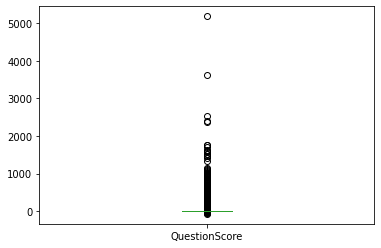

In [33]:
questionsdf.QuestionScore.plot(kind = 'box')

In [34]:
questionsdf.QuestionScore.describe()

count    1.264216e+06
mean     1.781537e+00
std      1.366389e+01
min     -7.300000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      5.190000e+03
Name: QuestionScore, dtype: float64

In [35]:
iqr = questionsdf.QuestionScore.quantile(.75) - questionsdf.QuestionScore.quantile(.25)
iqr

1.0

In [36]:
max = 1.5*iqr + questionsdf.QuestionScore.quantile(0.5)
max

1.5

### Final Score Analysis

Since Box plot is ranging and skewed a lot on upper side with very few questions of other tags, boxplot suggest heavy records
available till score of 1000 whereas describe and IQR drops it to value of maximum 2. So we started looking at number of records
from score of 5 and above

In [37]:
questionsdf[questionsdf.QuestionScore > 5].shape

(72950, 8)

In [38]:
questionsdf[questionsdf.QuestionScore > 10].shape

(32604, 8)

In [39]:
questionsdf[questionsdf.QuestionScore > 20].shape

(14114, 8)

### Removing All records/questions which has final score of above 20 without hurting DS tags and count of records

In [40]:
questionsdf = questionsdf[questionsdf.QuestionScore < 20]

In [41]:
questionsdf

,QuestionId,QuestionOwnerId,ClosedDate,QuestionScore,QuestionTitle,QuestionBody,QuestionDt,QuestionTm
6,470,71.0,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,I've been writing a few web services for a .ne...,2008-08-02,15:11:47
9,810,233.0,NaN,9,Visual Studio Setup Project - Per User Registr...,I'm trying to maintain a Setup Project in <cod...,2008-08-03,20:35:01
11,1010,67.0,NaN,14,"How to get the value of built, encoded ViewState?",I need to grab the base64-encoded representati...,2008-08-04,03:59:42
13,1070,236.0,NaN,17,Process size on UNIX,What is the correct way to get the process siz...,2008-08-04,07:34:44
15,1180,281.0,NaN,17,How to make subdomain user accounts in a webapp,I am looking to allow users to control of subd...,2008-08-04,12:22:07
...,...,...,...,...,...,...,...,...
1264211,40143210,5610777.0,NaN,0,URL routing in PHP (MVC),I am building a custom MVC project and I have ...,2016-10-19,23:38:01
1264212,40143300,3791161.0,NaN,0,Bigquery.Jobs.Insert - Resumable Upload?,The API docs show that you should be able to m...,2016-10-19,23:48:09
1264213,40143340,7028647.0,NaN,1,Obfuscating code in android studio,Under minifyEnabled I changed from false to tr...,2016-10-19,23:52:50
1264214,40143360,871677.0,NaN,0,How to fire function after v-model change?,I have input which I use to filter my array of...,2016-10-19,23:55:24


### Replot Box plot

Replotting box plot suggest heavy outliers on negative side as well

<AxesSubplot:>

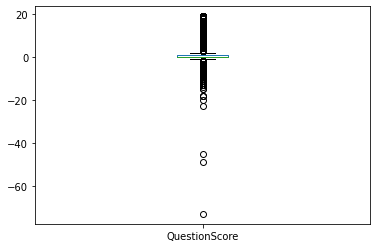

In [42]:
questionsdf.QuestionScore.plot(kind='box')

In [43]:
questionsdf[questionsdf.QuestionScore < -10].shape

(67, 8)

### Removing records with negative score more than -10 since records are minimal and are not of DS tags

In [44]:
questionsdf = questionsdf[questionsdf.QuestionScore > -10]

In [45]:
questionsdf

,QuestionId,QuestionOwnerId,ClosedDate,QuestionScore,QuestionTitle,QuestionBody,QuestionDt,QuestionTm
6,470,71.0,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,I've been writing a few web services for a .ne...,2008-08-02,15:11:47
9,810,233.0,NaN,9,Visual Studio Setup Project - Per User Registr...,I'm trying to maintain a Setup Project in <cod...,2008-08-03,20:35:01
11,1010,67.0,NaN,14,"How to get the value of built, encoded ViewState?",I need to grab the base64-encoded representati...,2008-08-04,03:59:42
13,1070,236.0,NaN,17,Process size on UNIX,What is the correct way to get the process siz...,2008-08-04,07:34:44
15,1180,281.0,NaN,17,How to make subdomain user accounts in a webapp,I am looking to allow users to control of subd...,2008-08-04,12:22:07
...,...,...,...,...,...,...,...,...
1264211,40143210,5610777.0,NaN,0,URL routing in PHP (MVC),I am building a custom MVC project and I have ...,2016-10-19,23:38:01
1264212,40143300,3791161.0,NaN,0,Bigquery.Jobs.Insert - Resumable Upload?,The API docs show that you should be able to m...,2016-10-19,23:48:09
1264213,40143340,7028647.0,NaN,1,Obfuscating code in android studio,Under minifyEnabled I changed from false to tr...,2016-10-19,23:52:50
1264214,40143360,871677.0,NaN,0,How to fire function after v-model change?,I have input which I use to filter my array of...,2016-10-19,23:55:24


### Final Box Plot

<AxesSubplot:>

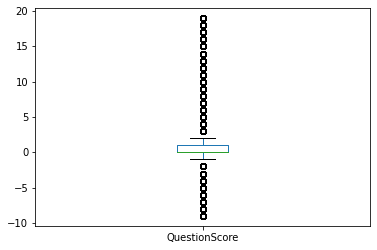

In [46]:
questionsdf.QuestionScore.plot(kind = 'box')

In [47]:
answersdf

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."
...,...,...,...,...,...,...
2014511,40143247,333403.0,2016-10-19T23:42:35Z,40143190,0,"<p>Tanks to <a href=""http://stackoverflow.com/..."
2014512,40143322,642706.0,2016-10-19T23:50:35Z,40137110,1,<h1>tl;dr</h1>\n\n<pre><code>ZonedDateTime.par...
2014513,40143336,2239781.0,2016-10-19T23:52:08Z,40141860,0,<p>I came up with a very dirty workaround. Bef...
2014514,40143349,6934347.0,2016-10-19T23:54:02Z,40077010,0,<p>I solved my own problem defining the follow...


In [48]:
answersdf.rename(columns={'OwnerUserId':'AnswerOwnerId','CreationDate':'AnswerTS','ParentId':'QuestionId','Score':'AnswerScore','Body':'AnswerBody'},inplace=True)

In [49]:
answersdf

,Id,AnswerOwnerId,AnswerTS,QuestionId,AnswerScore,AnswerBody
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."
...,...,...,...,...,...,...
2014511,40143247,333403.0,2016-10-19T23:42:35Z,40143190,0,"<p>Tanks to <a href=""http://stackoverflow.com/..."
2014512,40143322,642706.0,2016-10-19T23:50:35Z,40137110,1,<h1>tl;dr</h1>\n\n<pre><code>ZonedDateTime.par...
2014513,40143336,2239781.0,2016-10-19T23:52:08Z,40141860,0,<p>I came up with a very dirty workaround. Bef...
2014514,40143349,6934347.0,2016-10-19T23:54:02Z,40077010,0,<p>I solved my own problem defining the follow...


### Formating TimeStamp Column of Answers Dataset like Questions Dataset

In [50]:
answersdf.AnswerTS = pd.to_datetime(answersdf.AnswerTS, format='%Y-%m-%d %H:%M')

In [51]:
answersdf['AnswerDt'] = answersdf.AnswerTS.dt.date

In [52]:
answersdf['AnswerTm'] = answersdf.AnswerTS.dt.time

In [53]:
answersdf

,Id,AnswerOwnerId,AnswerTS,QuestionId,AnswerScore,AnswerBody,AnswerDt,AnswerTm
0,92,61.0,2008-08-01 14:45:37+00:00,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",2008-08-01,14:45:37
1,124,26.0,2008-08-01 16:09:47+00:00,80,12,<p>I wound up using this. It is a kind of a ha...,2008-08-01,16:09:47
2,199,50.0,2008-08-01 19:36:46+00:00,180,1,<p>I've read somewhere the human eye can't dis...,2008-08-01,19:36:46
3,269,91.0,2008-08-01 23:49:57+00:00,260,4,"<p>Yes, I thought about that, but I soon figur...",2008-08-01,23:49:57
4,307,49.0,2008-08-02 01:49:46+00:00,260,28,"<p><a href=""http://www.codeproject.com/Article...",2008-08-02,01:49:46
...,...,...,...,...,...,...,...,...
2014511,40143247,333403.0,2016-10-19 23:42:35+00:00,40143190,0,"<p>Tanks to <a href=""http://stackoverflow.com/...",2016-10-19,23:42:35
2014512,40143322,642706.0,2016-10-19 23:50:35+00:00,40137110,1,<h1>tl;dr</h1>\n\n<pre><code>ZonedDateTime.par...,2016-10-19,23:50:35
2014513,40143336,2239781.0,2016-10-19 23:52:08+00:00,40141860,0,<p>I came up with a very dirty workaround. Bef...,2016-10-19,23:52:08
2014514,40143349,6934347.0,2016-10-19 23:54:02+00:00,40077010,0,<p>I solved my own problem defining the follow...,2016-10-19,23:54:02


In [54]:
answersdf.drop(labels='AnswerTS',axis=1,inplace=True)

In [55]:
answersdf

,Id,AnswerOwnerId,QuestionId,AnswerScore,AnswerBody,AnswerDt,AnswerTm
0,92,61.0,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers...",2008-08-01,14:45:37
1,124,26.0,80,12,<p>I wound up using this. It is a kind of a ha...,2008-08-01,16:09:47
2,199,50.0,180,1,<p>I've read somewhere the human eye can't dis...,2008-08-01,19:36:46
3,269,91.0,260,4,"<p>Yes, I thought about that, but I soon figur...",2008-08-01,23:49:57
4,307,49.0,260,28,"<p><a href=""http://www.codeproject.com/Article...",2008-08-02,01:49:46
...,...,...,...,...,...,...,...
2014511,40143247,333403.0,40143190,0,"<p>Tanks to <a href=""http://stackoverflow.com/...",2016-10-19,23:42:35
2014512,40143322,642706.0,40137110,1,<h1>tl;dr</h1>\n\n<pre><code>ZonedDateTime.par...,2016-10-19,23:50:35
2014513,40143336,2239781.0,40141860,0,<p>I came up with a very dirty workaround. Bef...,2016-10-19,23:52:08
2014514,40143349,6934347.0,40077010,0,<p>I solved my own problem defining the follow...,2016-10-19,23:54:02


### Cleaning Answers Columns by Removing HTML Tags

In [56]:
answersdf.AnswerBody = answersdf.AnswerBody.apply(lambda x: x.replace('<p>','').replace('</p>','').replace('<a href="','').replace('</a>',''))

In [57]:
answersdf

,Id,AnswerOwnerId,QuestionId,AnswerScore,AnswerBody,AnswerDt,AnswerTm
0,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37
1,124,26.0,80,12,"I wound up using this. It is a kind of a hack,...",2008-08-01,16:09:47
2,199,50.0,180,1,I've read somewhere the human eye can't distin...,2008-08-01,19:36:46
3,269,91.0,260,4,"Yes, I thought about that, but I soon figured ...",2008-08-01,23:49:57
4,307,49.0,260,28,http://www.codeproject.com/Articles/8656/C-Scr...,2008-08-02,01:49:46
...,...,...,...,...,...,...,...
2014511,40143247,333403.0,40143190,0,Tanks to http://stackoverflow.com/a/37222377/3...,2016-10-19,23:42:35
2014512,40143322,642706.0,40137110,1,<h1>tl;dr</h1>\n\n<pre><code>ZonedDateTime.par...,2016-10-19,23:50:35
2014513,40143336,2239781.0,40141860,0,I came up with a very dirty workaround. Before...,2016-10-19,23:52:08
2014514,40143349,6934347.0,40077010,0,I solved my own problem defining the following...,2016-10-19,23:54:02


### Boxplot analysis of Answers Score

<AxesSubplot:>

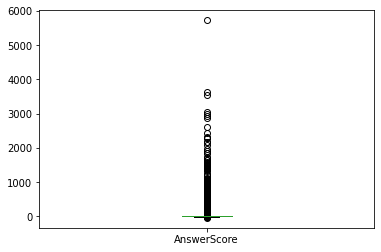

In [58]:
answersdf.AnswerScore.plot(kind='box')

In [59]:
answersdf.AnswerScore.describe()

count    2.014516e+06
mean     2.480563e+00
std      1.590938e+01
min     -4.200000e+01
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.718000e+03
Name: AnswerScore, dtype: float64

In [60]:
answersdf[answersdf.AnswerScore > 20].shape

(29160, 7)

In [61]:
answersdf[answersdf.AnswerScore > 30].shape

(17719, 7)

### Dropping all answers with scores more than 30

In [62]:
answersdf = answersdf[answersdf.AnswerScore < 30]

<AxesSubplot:>

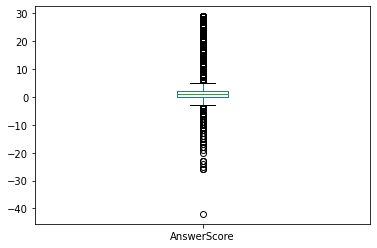

In [63]:
answersdf.AnswerScore.plot(kind='box')

In [64]:
answersdf[answersdf.AnswerScore < 0].shape

(35046, 7)

In [65]:
answersdf[answersdf.AnswerScore < -0.5].shape

(35046, 7)

### Dropping all answers with negative scores that is less than -1

In [66]:
answersdf = answersdf[answersdf.AnswerScore > -1]

In [67]:
answersdf

,Id,AnswerOwnerId,QuestionId,AnswerScore,AnswerBody,AnswerDt,AnswerTm
0,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37
1,124,26.0,80,12,"I wound up using this. It is a kind of a hack,...",2008-08-01,16:09:47
2,199,50.0,180,1,I've read somewhere the human eye can't distin...,2008-08-01,19:36:46
3,269,91.0,260,4,"Yes, I thought about that, but I soon figured ...",2008-08-01,23:49:57
4,307,49.0,260,28,http://www.codeproject.com/Articles/8656/C-Scr...,2008-08-02,01:49:46
...,...,...,...,...,...,...,...
2014511,40143247,333403.0,40143190,0,Tanks to http://stackoverflow.com/a/37222377/3...,2016-10-19,23:42:35
2014512,40143322,642706.0,40137110,1,<h1>tl;dr</h1>\n\n<pre><code>ZonedDateTime.par...,2016-10-19,23:50:35
2014513,40143336,2239781.0,40141860,0,I came up with a very dirty workaround. Before...,2016-10-19,23:52:08
2014514,40143349,6934347.0,40077010,0,I solved my own problem defining the following...,2016-10-19,23:54:02


<AxesSubplot:>

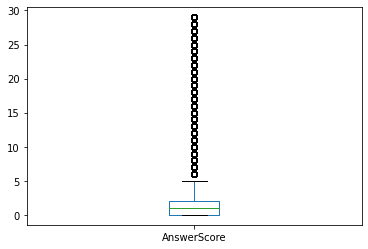

In [68]:
answersdf.AnswerScore.plot(kind='box')

In [69]:
tagsdf

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
...,...,...
3750989,40143360,javascript
3750990,40143360,vue.js
3750991,40143380,npm
3750992,40143380,mocha


In [70]:
tagsdf.rename(columns={'Id':'QuestionId'},inplace=True)

In [71]:
tagsdf

,QuestionId,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
...,...,...
3750989,40143360,javascript
3750990,40143360,vue.js
3750991,40143380,npm
3750992,40143380,mocha


In [72]:
tagsdf[tagsdf.QuestionId.isnull()]

,QuestionId,Tag


In [73]:
tagsdf[tagsdf.Tag.isnull()]

,QuestionId,Tag
947,32280,NaN
4755,140030,NaN
6892,191640,NaN
11107,283190,NaN
11570,291340,NaN
...,...,...
3722203,39916800,NaN
3726905,39953580,NaN
3729127,39970580,NaN
3731869,39992410,NaN


### Removed Tags containing nulls

In [74]:
tagsdf = tagsdf[~(tagsdf.Tag.isnull())]

In [75]:
tagsdf

,QuestionId,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
...,...,...
3750989,40143360,javascript
3750990,40143360,vue.js
3750991,40143380,npm
3750992,40143380,mocha


In [117]:
reluserdf = answersdf.merge(tagsdf, on = 'QuestionId')

In [118]:
reluserdf

,Id,AnswerOwnerId,QuestionId,AnswerScore,AnswerBody,AnswerDt,AnswerTm,Tag
0,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,svn
1,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,tortoisesvn
2,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,branch
3,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,branching-and-merging
4,202317,20709.0,90,2,You can also try <em>http://www.codeproject.co...,2008-10-14,18:41:45,svn
...,...,...,...,...,...,...,...,...
5737765,40143349,6934347.0,40077010,0,I solved my own problem defining the following...,2016-10-19,23:54:02,python
5737766,40143349,6934347.0,40077010,0,I solved my own problem defining the following...,2016-10-19,23:54:02,tensorflow
5737767,40143389,4464432.0,40142910,0,Try add <code>retrun false</code> in the <code...,2016-10-19,23:58:58,ruby-on-rails
5737768,40143389,4464432.0,40142910,0,Try add <code>retrun false</code> in the <code...,2016-10-19,23:58:58,validation


In [119]:
reluserdf.rename(columns={'AnswerOwnerId':'OwnerId'},inplace=True)

In [120]:
reluserdf

,Id,OwnerId,QuestionId,AnswerScore,AnswerBody,AnswerDt,AnswerTm,Tag
0,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,svn
1,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,tortoisesvn
2,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,branch
3,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,branching-and-merging
4,202317,20709.0,90,2,You can also try <em>http://www.codeproject.co...,2008-10-14,18:41:45,svn
...,...,...,...,...,...,...,...,...
5737765,40143349,6934347.0,40077010,0,I solved my own problem defining the following...,2016-10-19,23:54:02,python
5737766,40143349,6934347.0,40077010,0,I solved my own problem defining the following...,2016-10-19,23:54:02,tensorflow
5737767,40143389,4464432.0,40142910,0,Try add <code>retrun false</code> in the <code...,2016-10-19,23:58:58,ruby-on-rails
5737768,40143389,4464432.0,40142910,0,Try add <code>retrun false</code> in the <code...,2016-10-19,23:58:58,validation


In [121]:
usersdf

,OwnerId,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96
...,...,...,...,...,...,...,...,...
1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283 UTC,2019-08-28 18:01:29.56 UTC,415,112,2,17
1990476,6820506,Manuela,2016-09-12 00:19:17.83 UTC,2018-07-20 01:28:24.853 UTC,21,38,0,50
1990477,4464432,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191


In [122]:
usersdf.rename(columns={'id':'OwnerId'},inplace=True)

/home/ec2-user/.local/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [123]:
usersdf

,OwnerId,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.52 UTC,2018-04-11 04:40:35.66 UTC,11820,565,67,3547
27,1109,Theo,2008-08-12 12:16:58.61 UTC,2019-08-31 11:39:52.28 UTC,116072,457,136,6905
85,364174,stats,2010-06-11 03:34:57.137 UTC,2019-08-29 18:37:35.027 UTC,325,25,1,60
87,61,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
97,20709,Black Horus,2008-09-22 20:03:39.71 UTC,2019-09-01 01:17:38.133 UTC,978,73,2,96
...,...,...,...,...,...,...,...,...
1990475,4228492,Michael Spranger,2014-11-07 20:21:14.283 UTC,2019-08-28 18:01:29.56 UTC,415,112,2,17
1990476,6820506,Manuela,2016-09-12 00:19:17.83 UTC,2018-07-20 01:28:24.853 UTC,21,38,0,50
1990477,4464432,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
1990478,4605946,space_voyager,2015-02-25 13:43:24.63 UTC,2019-07-13 23:55:47.607 UTC,884,53,1,191


In [124]:
reluserdf = reluserdf.merge(usersdf, on = 'OwnerId')

### Final Dataset for 1st Question to notify relevent Users

This Dataset have Answer Owner ID, their correspoding tags and user names. This can be used blindly to notify the respective
users who have previously answered those tags. This DF doesn't have relevant users anyways

In [125]:
reluserdf

,Id,OwnerId,QuestionId,AnswerScore,AnswerBody,AnswerDt,AnswerTm,Tag,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,svn,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
1,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,tortoisesvn,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
2,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,branch,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
3,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,branching-and-merging,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
4,33759,61.0,24270,1,I know I find OOP useful pretty much solely on...,2008-08-29,01:30:38,language-agnostic,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649594,40143349,6934347.0,40077010,0,I solved my own problem defining the following...,2016-10-19,23:54:02,python,maurizio,2016-10-06 21:21:58.96 UTC,2019-07-19 21:33:33.51 UTC,151,9,0,8
5649595,40143349,6934347.0,40077010,0,I solved my own problem defining the following...,2016-10-19,23:54:02,tensorflow,maurizio,2016-10-06 21:21:58.96 UTC,2019-07-19 21:33:33.51 UTC,151,9,0,8
5649596,40143389,4464432.0,40142910,0,Try add <code>retrun false</code> in the <code...,2016-10-19,23:58:58,ruby-on-rails,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
5649597,40143389,4464432.0,40142910,0,Try add <code>retrun false</code> in the <code...,2016-10-19,23:58:58,validation,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13


### Bivariate Analysis to get Tags which received highest Scores 

In [ ]:
reluserdf.groupby('Tag')['AnswerScore'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Tag,AnswerScore'>

In [85]:
tatdf = answersdf.merge(tagsdf, on = 'QuestionId')

In [86]:
tatdf

,Id,AnswerOwnerId,QuestionId,AnswerScore,AnswerBody,AnswerDt,AnswerTm,Tag
0,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,svn
1,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,tortoisesvn
2,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,branch
3,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,branching-and-merging
4,202317,20709.0,90,2,You can also try <em>http://www.codeproject.co...,2008-10-14,18:41:45,svn
...,...,...,...,...,...,...,...,...
5737765,40143349,6934347.0,40077010,0,I solved my own problem defining the following...,2016-10-19,23:54:02,python
5737766,40143349,6934347.0,40077010,0,I solved my own problem defining the following...,2016-10-19,23:54:02,tensorflow
5737767,40143389,4464432.0,40142910,0,Try add <code>retrun false</code> in the <code...,2016-10-19,23:58:58,ruby-on-rails
5737768,40143389,4464432.0,40142910,0,Try add <code>retrun false</code> in the <code...,2016-10-19,23:58:58,validation


In [87]:
tatdf = tatdf.merge(questionsdf, on = 'QuestionId')

### Find out Turnaround Time for tags

This final DF will contain when question was created for a particular tag and when answer was created. Subtracting them and
loading them into RDS can help directly put Turn around Time for each tag as soon as question is posted

In [88]:
tatdf

,Id,AnswerOwnerId,QuestionId,AnswerScore,AnswerBody,AnswerDt,AnswerTm,Tag,QuestionOwnerId,ClosedDate,QuestionScore,QuestionTitle,QuestionBody,QuestionDt,QuestionTm
0,473,49.0,470,8,"No, what you're doing is fine. Don't let those...",2008-08-02,15:33:13,.net,71.0,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,I've been writing a few web services for a .ne...,2008-08-02,15:11:47
1,473,49.0,470,8,"No, what you're doing is fine. Don't let those...",2008-08-02,15:33:13,web-services,71.0,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,I've been writing a few web services for a .ne...,2008-08-02,15:11:47
2,818,233.0,810,0,I'm partway to my solution with this entry on ...,2008-08-03,20:45:27,windows,233.0,NaN,9,Visual Studio Setup Project - Per User Registr...,I'm trying to maintain a Setup Project in <cod...,2008-08-03,20:35:01
3,818,233.0,810,0,I'm partway to my solution with this entry on ...,2008-08-03,20:45:27,visual-studio,233.0,NaN,9,Visual Studio Setup Project - Per User Registr...,I'm trying to maintain a Setup Project in <cod...,2008-08-03,20:35:01
4,818,233.0,810,0,I'm partway to my solution with this entry on ...,2008-08-03,20:45:27,registry,233.0,NaN,9,Visual Studio Setup Project - Per User Registr...,I'm trying to maintain a Setup Project in <cod...,2008-08-03,20:35:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525479,40143349,6934347.0,40077010,0,I solved my own problem defining the following...,2016-10-19,23:54:02,python,6934347.0,NaN,2,Can't pass random variable to tf.image.central...,In Tensorflow I am training from a set of PNG ...,2016-10-17,00:33:51
5525480,40143349,6934347.0,40077010,0,I solved my own problem defining the following...,2016-10-19,23:54:02,tensorflow,6934347.0,NaN,2,Can't pass random variable to tf.image.central...,In Tensorflow I am training from a set of PNG ...,2016-10-17,00:33:51
5525481,40143389,4464432.0,40142910,0,Try add <code>retrun false</code> in the <code...,2016-10-19,23:58:58,ruby-on-rails,4825744.0,NaN,0,Validation for must_be_below_user_limit allowi...,So I Am building a multi-tenant app in Rails 4...,2016-10-19,23:05:49
5525482,40143389,4464432.0,40142910,0,Try add <code>retrun false</code> in the <code...,2016-10-19,23:58:58,validation,4825744.0,NaN,0,Validation for must_be_below_user_limit allowi...,So I Am building a multi-tenant app in Rails 4...,2016-10-19,23:05:49


### Create Column to get Time Lapsed while posting the answers in terms of days

In [ ]:
tatdf['TimeLapse'] = tatdf.AnswerDt - tatdf.QuestionDt

### Bivariate Analysis to get Tags and their answers and see which tag has minimum TAT

In [ ]:
tatdf.groupby('Tags')['TimeLapse'].values_counts().plot(kind='hist')

### Third Dataframe for 3rd question to suggest previous questions on same tag

This dataframe will help us pull previous asked question under a tag and load it into RDS. As soon as a tag will be added by
user, previous relevent questions along with their score starting gtom highest score suggested as fist and lowest as last can
be fetched from RDS and posted to user

In [89]:
suggestdf = questionsdf.merge(tagsdf, on = 'QuestionId')

In [90]:
suggestdf

,QuestionId,QuestionOwnerId,ClosedDate,QuestionScore,QuestionTitle,QuestionBody,QuestionDt,QuestionTm,Tag
0,470,71.0,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,I've been writing a few web services for a .ne...,2008-08-02,15:11:47,.net
1,470,71.0,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,I've been writing a few web services for a .ne...,2008-08-02,15:11:47,web-services
2,810,233.0,NaN,9,Visual Studio Setup Project - Per User Registr...,I'm trying to maintain a Setup Project in <cod...,2008-08-03,20:35:01,windows
3,810,233.0,NaN,9,Visual Studio Setup Project - Per User Registr...,I'm trying to maintain a Setup Project in <cod...,2008-08-03,20:35:01,visual-studio
4,810,233.0,NaN,9,Visual Studio Setup Project - Per User Registr...,I'm trying to maintain a Setup Project in <cod...,2008-08-03,20:35:01,registry
...,...,...,...,...,...,...,...,...,...
3704217,40143360,871677.0,NaN,0,How to fire function after v-model change?,I have input which I use to filter my array of...,2016-10-19,23:55:24,javascript
3704218,40143360,871677.0,NaN,0,How to fire function after v-model change?,I have input which I use to filter my array of...,2016-10-19,23:55:24,vue.js
3704219,40143380,6823982.0,NaN,0,npm run mocha test - files being cached,I'm running a mocha test and I noticed my chan...,2016-10-19,23:57:31,npm
3704220,40143380,6823982.0,NaN,0,npm run mocha test - files being cached,I'm running a mocha test and I noticed my chan...,2016-10-19,23:57:31,mocha


### Connect to RDS

In [91]:
# Connector object

dbc = mysql.connector.connect(
    host="test-instance.cltllhxhy1ha.us-east-1.rds.amazonaws.com",
    user = "master",
    passwd = "master1234",
    port = 3306,
    db = 'stackdb'
)

### Define CURSOR to perform operations

In [92]:
# Defining the cursor object

cur = dbc.cursor()

### Code to Create Suggest Questions

Commented Code so we don't end up creating them everytime

In [93]:
# Creating table to store questions to suggest
# commenting code after first execution to avoid inadvertent creation of table or receive errors

#cur.execute("CREATE TABLE suggestquestion (qid VARCHAR(255), qtitle VARCHAR(255), qscore VARCHAR(255), tags VARCHAR(255))")

### Code to Create table to send notifications to appropriate users Questions

Commented Code so we don't end up creating them everytime

In [94]:
# Creating table to store owner id to send notification
# commenting code after first execution to avoid inadvertent creation of table or receive errors

#cur.execute("CREATE TABLE notifyuser (oid VARCHAR(255), tags VARCHAR(255))")

### Code to Create table to identify Turnaround Time

Commented Code so we don't end up creating them everytime

In [95]:
# Creating table to store average response time
# commenting code after first execution to avoid inadvertent creation of table or receive errors

#cur.execute("CREATE TABLE responsetime (avgtat VARCHAR(255), tags VARCHAR(255))")

In [96]:
notifydbdf = reluserdf

In [97]:
notifydbdf

,Id,OwnerId,QuestionId,AnswerScore,AnswerBody,AnswerDt,AnswerTm,Tag,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,svn,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
1,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,tortoisesvn,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
2,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,branch,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
3,92,61.0,90,13,"http://svnbook.red-bean.com/"">Version Control ...",2008-08-01,14:45:37,branching-and-merging,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
4,33759,61.0,24270,1,I know I find OOP useful pretty much solely on...,2008-08-29,01:30:38,language-agnostic,Bernard,2008-08-01 14:21:00.573 UTC,2019-08-30 07:11:58.297 UTC,22779,1321,219,1731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649594,40143349,6934347.0,40077010,0,I solved my own problem defining the following...,2016-10-19,23:54:02,python,maurizio,2016-10-06 21:21:58.96 UTC,2019-07-19 21:33:33.51 UTC,151,9,0,8
5649595,40143349,6934347.0,40077010,0,I solved my own problem defining the following...,2016-10-19,23:54:02,tensorflow,maurizio,2016-10-06 21:21:58.96 UTC,2019-07-19 21:33:33.51 UTC,151,9,0,8
5649596,40143389,4464432.0,40142910,0,Try add <code>retrun false</code> in the <code...,2016-10-19,23:58:58,ruby-on-rails,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13
5649597,40143389,4464432.0,40142910,0,Try add <code>retrun false</code> in the <code...,2016-10-19,23:58:58,validation,YTorii,2015-01-17 10:48:17.523 UTC,2019-08-31 13:51:47.413 UTC,336,67,1,13


In [98]:
notifydbdf.drop(labels=['Id','QuestionId','AnswerScore','AnswerBody','AnswerDt','AnswerTm','creation_date','last_access_date'],axis=1,inplace=True)

In [99]:
notifydbdf

,OwnerId,Tag,display_name,reputation,up_votes,down_votes,views
0,61.0,svn,Bernard,22779,1321,219,1731
1,61.0,tortoisesvn,Bernard,22779,1321,219,1731
2,61.0,branch,Bernard,22779,1321,219,1731
3,61.0,branching-and-merging,Bernard,22779,1321,219,1731
4,61.0,language-agnostic,Bernard,22779,1321,219,1731
...,...,...,...,...,...,...,...
5649594,6934347.0,python,maurizio,151,9,0,8
5649595,6934347.0,tensorflow,maurizio,151,9,0,8
5649596,4464432.0,ruby-on-rails,YTorii,336,67,1,13
5649597,4464432.0,validation,YTorii,336,67,1,13


In [100]:
notifydbdf.drop(labels=['reputation','up_votes','down_votes','views'],axis=1,inplace=True)

In [101]:
notifydbdf

,OwnerId,Tag,display_name
0,61.0,svn,Bernard
1,61.0,tortoisesvn,Bernard
2,61.0,branch,Bernard
3,61.0,branching-and-merging,Bernard
4,61.0,language-agnostic,Bernard
...,...,...,...
5649594,6934347.0,python,maurizio
5649595,6934347.0,tensorflow,maurizio
5649596,4464432.0,ruby-on-rails,YTorii
5649597,4464432.0,validation,YTorii


In [102]:
notifydbdf.drop(labels=['display_name'],axis=1,inplace=True)

In [103]:
notifydbdf

,OwnerId,Tag
0,61.0,svn
1,61.0,tortoisesvn
2,61.0,branch
3,61.0,branching-and-merging
4,61.0,language-agnostic
...,...,...
5649594,6934347.0,python
5649595,6934347.0,tensorflow
5649596,4464432.0,ruby-on-rails
5649597,4464432.0,validation


In [104]:
notifydbdf.drop_duplicates(inplace=True)

In [105]:
notifydbdf.Tag.value_counts()

javascript            79832
java                  68218
php                   62139
c#                    55236
jquery                54851
                      ...  
textexpander              1
pstack                    1
l-systems                 1
contacts-framework        1
wirejs                    1
Name: Tag, Length: 35385, dtype: int64

In [106]:
notifydbdf[(notifydbdf.Tag == 'python') | (notifydbdf.Tag == 'Python') | (notifydbdf.Tag == 'sql') | (notifydbdf.Tag == 'excel')]

,OwnerId,Tag
70,26.0,sql
304,50.0,sql
334,50.0,python
399,86.0,python
413,157.0,python
...,...,...
5649531,839224.0,python
5649545,7044747.0,python
5649567,6942565.0,python
5649579,7039394.0,python


In [107]:
notifydbdf = notifydbdf[(notifydbdf.Tag == 'python') | (notifydbdf.Tag == 'Python') | (notifydbdf.Tag == 'sql') | (notifydbdf.Tag == 'excel')]

### Sample Dataframe to load to RDS for notifying Python, SQL and Excel Tags

This dataframe is created as sample how we can tune RDS tables as per Dataframe or tune Dataframe as per RDS tables for loading
it into RDS. In this case, we created and tone down one Dataframe to notify owner ID's once a question is posted

In [108]:
notifydbdf

,OwnerId,Tag
70,26.0,sql
304,50.0,sql
334,50.0,python
399,86.0,python
413,157.0,python
...,...,...
5649531,839224.0,python
5649545,7044747.0,python
5649567,6942565.0,python
5649579,7039394.0,python


### Insert Rows blindly into RDS

Commeting below code to avoid multiple insertions once 70K records are inserted

In [109]:
# Inserting the values into columns

#for i,data in notifydbdf.iterrows():
#    sql = "INSERT INTO notifyuser(oid,tags) VALUES (%s,%s)"
#    cur.execute(sql,tuple(data))

### Fetch from RDS as per requirement, that is pass Python or SQL or Excel to get onwer ID's to send notification

In [110]:
# Read the stored values from RDS

cur.execute("SELECT * FROM notifyuser")
result = cur.fetchall()
print(result)

[('26.0', 'sql'), ('50.0', 'sql'), ('50.0', 'python'), ('86.0', 'python'), ('157.0', 'python'), ('5845.0', 'excel'), ('16582.0', 'python'), ('115432.0', 'sql'), ('115432.0', 'python'), ('135862.0', 'python'), ('91.0', 'sql'), ('905.0', 'sql'), ('905.0', 'excel'), ('342.0', 'python'), ('11521.0', 'python'), ('149.0', 'sql'), ('116.0', 'sql'), ('116.0', 'python'), ('76.0', 'sql'), ('307.0', 'sql'), ('1219.0', 'sql'), ('1073.0', 'sql'), ('1070.0', 'sql'), ('1070.0', 'excel'), ('3241.0', 'sql'), ('351154.0', 'sql'), ('233.0', 'sql'), ('233.0', 'excel'), ('234.0', 'sql'), ('95.0', 'sql'), ('95.0', 'python'), ('95.0', 'excel'), ('202.0', 'sql'), ('5720.0', 'sql'), ('51.0', 'sql'), ('275.0', 'sql'), ('46642.0', 'python'), ('214977.0', 'sql'), ('214977.0', 'excel'), ('17.0', 'sql'), ('1559.0', 'python'), ('3043.0', 'sql'), ('3043.0', 'excel'), ('729.0', 'sql'), ('225.0', 'sql'), ('65706.0', 'sql'), ('14690.0', 'sql'), ('571.0', 'sql'), ('3271.0', 'sql'), ('2094.0', 'python'), ('269.0', 'sql'),